# Business problem:

Companies usually have a greater focus on customer acquisition and keep retention as a secondary priority. However, it can cost five times more to attract a new customer than it does to retain an existing one. Increasing customer retention rates by 5% can increase profits by 25% to 95%, according to research done by Bain & Company.

Churn is a metric that shows customers who stop doing business with a company or a particular service, also known as customer attrition. By following this metric, what most businesses could do was try to understand the reason behind churn numbers and tackle those factors, with reactive action plans.

But what if you could know in advance that a specific customer is likely to leave your business, and have a chance to take proper actions in time to prevent it from happening?
The reasons that lead customers to the cancellation decision can be numerous, coming from poor service quality, delay on customer support, prices, new competitors entering the market, and so on. Usually, there is no single reason, but a combination of events that somehow culminated in customer displeasure.

If your company were not capable to identify these signals and take actions prior to the cancel button click, there is no turning back, your customer is already gone. But you still have something valuable: the data. Your customer left very good clues about where you left to be desired. It can be a valuable source for meaningful insights and to train customer churn models. Learn from the past, and have strategic information at hand to improve future experiences, it’s all about machine learning.

Our goal in this project is to understand churn behaviour among customers. Subsequent to that we need to train a machine learning model to identify these signals from a customer before they churn. Once deployed, our model will identify customers who might churn and alert us to take necessary steps to prevent their churn.

# Initialisation

In [1]:
###############################################################################
#
#Importing libraries
#
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split as tts
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler
from numpy import random
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, recall_score as R
import warnings
###############################################################################
#
#Notebook options
#
plt.style.use('fivethirtyeight')
pd.options.display.max_columns =100
warnings.filterwarnings('ignore')
###############################################################################
#
#Reading the data
#
df = pd.read_csv(r"../Data/Telco-Customer-Churn.csv")
df.drop(["customerID"], axis=1, inplace=True)
###############################################################################

# Data description

In [38]:
df.describe(include="all")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [39]:
print("Are there any missing columns \n", ((pd.DataFrame(df.isnull().sum()).sum())>0))

Are there any missing columns 
 0    False
dtype: bool


# Data exploration

## Personal features

In [40]:
#Getting the values for the pie plot
def personal_features(df):
    t=df[df.Churn=="Yes"].gender.size
    m=(pd.Series(map(int,df[df.Churn=="Yes"].gender=="Male"))).sum()
    f=t-m
    l1=['Male','Female']
    v1=[m,f]

    ts=df[df.Churn=="Yes"].SeniorCitizen.size
    s=(pd.Series(map(int,df[df.Churn=="Yes"].SeniorCitizen==1))).sum()
    ns=ts-s
    l2=['Senior Citizen','Not a senior citizen']
    v2=[s,ns]

    tp=df[df.Churn=="Yes"].Partner.size
    p=(pd.Series(map(int,df[df.Churn=="Yes"].Partner=="Yes"))).sum()
    np=tp-p
    l3=['Committed','Single']
    v3=[p,np]
    td=df[df.Churn=="Yes"].Dependents.size
    d=(pd.Series(map(int,df[df.Churn=="Yes"].Dependents=="Yes"))).sum()
    nd=td-d
    l4=['Has dependents','No dependents']
    v4=[d,nd]

    #Making the figure
    fig = make_subplots(rows=2,cols=2, specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]])

    fig.add_trace(go.Pie(labels=l1, values=v1),1,1)
    fig.add_trace(go.Pie(labels=l2, values=v2),1,2)
    fig.add_trace(go.Pie(labels=l3, values=v3),2,1)
    fig.add_trace(go.Pie(labels=l4, values=v4),2,2)

    fig.update_traces(hole=0.7, textinfo='label+percent', insidetextorientation='radial', showlegend=False)
    fig.update_layout(autosize=False, width=1500, height=800)
    fig.update(layout_title_text="Effect of personal factors on churn", layout_title_font_size=24)    
    fig.show()

personal_features(df)    

Observations:

* Gender has no influence on churn
* Single people are more likely to churn
* People without dependents are more likely to churn

## Contract features

Text(0.5, 0.98, 'Relation between the type of contract and churn')

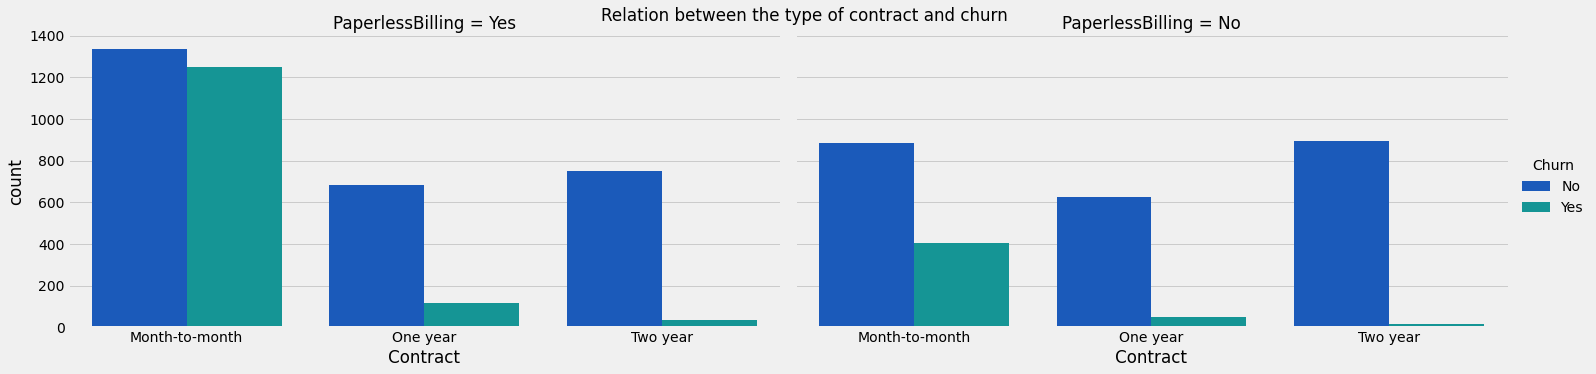

In [41]:
g=sns.catplot(data=df, x="Contract", col="PaperlessBilling", hue="Churn", kind="count", palette="winter", height=5, aspect=2.1)
g.fig.suptitle("Relation between the type of contract and churn")

Observations:

* Maximum people who churn are on a monthly contract and mostly bill in a paperless manner. Maybe these are tech savvy people who switch to a different carrier as soon as they find a better deal

In [42]:
fig1 = go.Figure(data=[
go.Bar(name="Churn", x= pd.DataFrame(df[df.Churn=="Yes"].PaymentMethod).groupby("PaymentMethod")["PaymentMethod"].count().index, y=pd.DataFrame(df[df.Churn=="Yes"].PaymentMethod).groupby("PaymentMethod")["PaymentMethod"].count().values),
go.Bar(name="Non churn", x= pd.DataFrame(df[df.Churn=="No"].PaymentMethod).groupby("PaymentMethod")["PaymentMethod"].count().index, y=pd.DataFrame(df[df.Churn=="No"].PaymentMethod).groupby("PaymentMethod")["PaymentMethod"].count().values)])

# Change the bar mode
fig1.update_layout(barmode='relative', width=1280, height=400)
fig1.update(layout_title_text="Relation between type of payment and churn", layout_title_font_size=24)    
fig1.show()

Observations

* Maximum people who pay electronically, churn. This supports our hypothesis that tech savvy people churn more often.

In [43]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df.TotalCharges.fillna(0, inplace=True)

Text(0.5, 1.0, 'Relation between charges and churn')

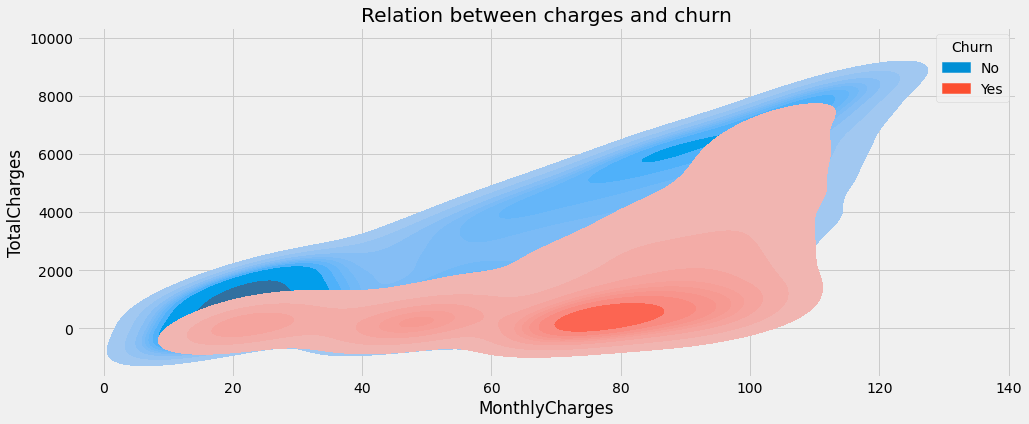

In [44]:
plt.figure(figsize=(15,6))
sns.kdeplot(x=df.MonthlyCharges, y=df.TotalCharges, hue=df.Churn, fill=True, multiple="stack")
plt.title("Relation between charges and churn")

Observations

* Most of the people who churn have low total charges with the carrier. 
* Some people who churn are customers who have high monthly and total charges. These are valuable customers whom we would want to retain.

Text(0.5, 1.0, 'Distribution of tenure with churn')

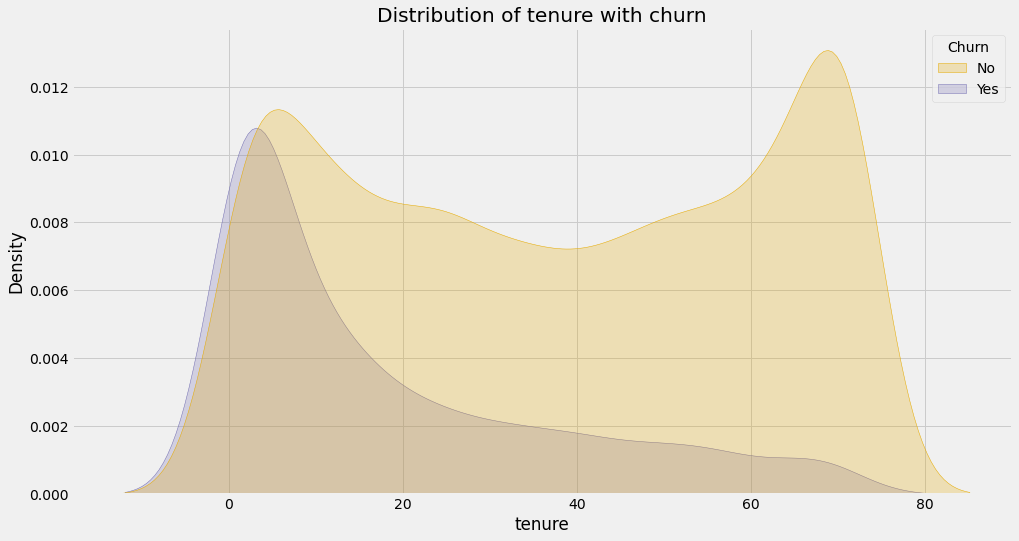

In [45]:
plt.figure(figsize=(15,8))
sns.kdeplot(df.tenure,hue=df.Churn, shade=True, palette="Dark2_r")
plt.title("Distribution of tenure with churn")

Observations:

* Maximum customers who churn do so during the early period of their subscription. We have to try to reduce early discontinuations of our service

## Service features

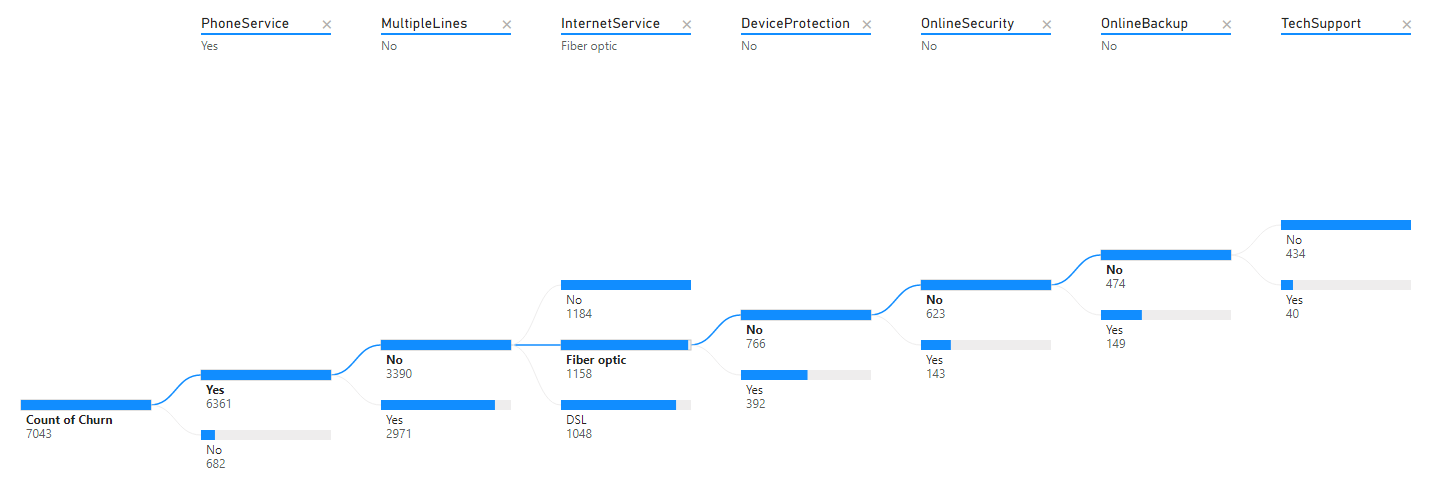

In [2]:
Image(filename = "../Data/img.png")

Observations

* Customers with single phone service and no internet service churn the most
* Among customers with internet service, they choose the faster Fibre optic without any protection/security or backup and churn the most 
* Among these customers who have churned, most have never contacted the tech support

These customers are young tech savvy thrifty customers who supposedly change the subscription as soon as they spot a better offer.

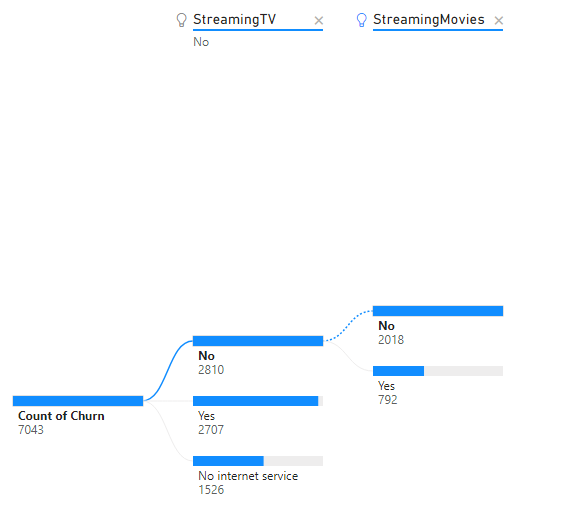

In [3]:
Image(filename = "../Data/img2.png")

Observations:

* Maximum people who churn do not stream movies or TV, i.e. they are not dependent on the subscription for streamed media consumption

# Data preparation

In [48]:
###############################################################################
#
# def preprocess(df)
# Input:
# df = input dataframe 
#
# 1. Prepare X and y as feature and target matrix
# 2. Binarize the target feature y
# 3. Segregate columns into binary, numeric and categorical features
# 4. Binarize the binary features
# 5. Convert categorical features to dummy variables
# 6. Perform standard scaling for all features
# 7. Convert the numpy arrays to dataframes for furthur processing
# 8. Return the formatted data
###############################################################################


def preprocess(df):
  X=df.drop('Churn', axis=1)
  y=df.Churn

  lb=LabelBinarizer()
  y=lb.fit_transform(y)

  binary_feat = X.nunique()[X.nunique() == 2].keys().tolist()
  numeric_feat = [col for col in X.select_dtypes(['float','int']).columns.tolist() if col not in binary_feat]
  categorical_feat = [ col for col in X.select_dtypes('object').columns.to_list() if col not in binary_feat + numeric_feat ]

  #le = LabelEncoder()
  for i in binary_feat:
    X[i] = lb.fit_transform(X[i])

  X = pd.get_dummies(X, columns=categorical_feat)
  sc=StandardScaler()
  X = sc.fit_transform(X)

  X=pd.DataFrame(X)
  y=pd.DataFrame(y)
  return X,y

## Undersampling the over represented class

In [49]:
###############################################################################
#
# def undersample(X,y)
# Input
# X = feature vectors
# y = response vector
#
# 1. Split the data into test and train sets
# 2. Undersample the overrepresented class in the training set
# 3. Perform standard scaling on the new set of features because the original distribution has been undersampled
# 4. Apply the same transformation on the test feature set
# 5. Return the X_train, X_test, y_train, y_test
#
###############################################################################

def undersample(X,y):
    x_train, x_test, y_tr,y_test = tts(X,y, test_size=0.2,random_state=42)
    rus = RandomUnderSampler()
    X_train_rus, y_train = rus.fit_resample(x_train, y_tr)
    sc1=StandardScaler()
    sc1.fit(X_train_rus)
    X_train = sc1.transform(X_train_rus)
    X_test = sc1.transform(x_test)
    return X_train, X_test, y_train, y_test

# Model

In [50]:
###############################################################################
#
# def build(model,X_train, X_test, y_train, y_test,c,e)
# 
# Input:
# model = the model object
# X_train, X_test = standard scaled train and test features
# y_train, y_test = response variables in train and test set
# c = Revenue lost due to churn of a singular customer
# e = Cost of focusing effort on a single to prevent his/her churn
#
# 1. Initialise variables 
# 2. Fit the model
# 3. r = recall_score
# 4. p = count of missed positive churn predictions 
# 5. Unravel the confusion matrix
# 6. Calculate F1 score
# 7. Calculate ROC score
# 8. Revenue = (Predicted & actual churn)*c -(count of missed actual positive prediction)*c - (predicted churn)*e
# 9. Send computed values to business function
#
###############################################################################

def build(model,X_train, X_test, y_train, y_test,c,e):  

    rev,p,r=0,0,0

    model.fit(X_train,y_train)
    y_pr=model.predict(X_test)

    r=round(R(y_test,y_pr)*100,2)
    p=round((100-r),2)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pr).ravel()
    f1 = f1_score(y_test,y_pr)
    roc = roc_auc_score(y_test, y_pr)
    rev = tp*c -fn*c - (tp+fp)*e
    return round(r,2), round(p,2), f1, roc,rev  

In [51]:
#########################################################################################
#
# def compute(df,c,e):
# 
# Input:
# df = input dataframe  
# c = Revenue lost due to churn of a singular customer
# e = Cost of focusing effort on a single to prevent his/her chur
#
# 1. Preprocesses the data
# 2. Splits the data into training and test set; undersamples the overrepresented class in training set 
# 3. Prepares models and calculates parameters
# 4. Collates all the data into a mod dataframe
# 5. Return the comparison database
#
#########################################################################################

def compute(df, *var):
    
    c=var[0]
    e=var[1]
    X,y=preprocess(df)
    X_train, X_test, y_train, y_test = undersample(X,y)

    svm = SVC(kernel='poly', C=0.001)
    g=GaussianNB()
    knnc=KNeighborsClassifier(n_neighbors=47)
    lr=LogisticRegression(solver='liblinear',C=0.01)

    pred_b,misd_b,f1_b,roc_b,rev_b=build(g,X_train, X_test, y_train, y_test,c,e)
    pred_knn,misd_knn,f1_knn,roc_knn,rev_knn=build(knnc,X_train, X_test, y_train, y_test,c,e)
    pred_lr,misd_lr,f1_lr,roc_lr,rev_lr=build(lr,X_train, X_test, y_train, y_test,c,e)
    pred_svm,misd_svm,f1_svm,roc_svm,rev_svm=build(svm,X_train, X_test, y_train, y_test,c,e)

    rev = [rev_svm,rev_b,rev_knn,rev_lr,]
    misd= [misd_svm,misd_b,misd_knn,misd_lr]
    pred= [pred_svm,pred_b,pred_knn,pred_lr]
    f1s= [f1_svm,f1_b,f1_knn,f1_lr]
    rocs= [roc_svm,roc_b,roc_knn,roc_lr]
    mod = ["Support Vector Machine", "Naive Bayes","K Nearest Neighbors","Logistic regression"]
    model = [svm,g,knnc,lr]

    mod = pd.DataFrame({"Revenue saved":rev,"Predicted(True positive)":pred,"Missed(False negative)":misd,"F1 score":f1s, "ROC_AUC":rocs,"Model":model}, index=mod)
    mod.sort_values(["Revenue saved"], ascending=False,inplace=True)
    
    return mod,X,y

# Business implication

In [63]:
#########################################################################################
#
# def business(mod,c,e):
# Input:
# mod = model details dataframe
# c = Revenue lost due to churn of a singular customer
# e = Cost of focusing effort on a single to prevent his/her chur
#  
# 1. lost = Total revenue lost due to churn = (Total reponses=1, i.e. churn) * (cost of churn)
# 2. best = best model as per revenue
# 3. Initialize some variables
# 4. Draw >30 samples of size 50% of df
# 5. x = Selecting random set of 50% customers
# 6. saved_churn = Count of churn predicted by the current sample * cost of churn
# 7. cost_of_effort = Total expenditure by focusing effort on random 50% of df
# 8. money_that_could_have_been_saved = difference between focusing effort on random 50% of the population and return on it by saving churn
# 9. cost_saved_by_model = revenue loss prevented by predicting churn using our model
# 10. avg_rev_lost = averages the money that could have been saved over all the 50 samples drawn each time
# 11. avg_money_saved = cost saved by our model + money that could have been saved
# 12. cost = averages the money that could have been saved over all sample draws
# 13. gained_rev = averages the money saved by our model as compared to random sampling over all sample draws
# 14. Print summary
#
#########################################################################################

def business(df,y,mod,c,e):

    lb=LabelBinarizer()
    lost=lb.fit_transform(y).sum()*c 

    best=mod.head(1)

    avg_rev_lost=[]
    avg_money_saved=[]

    for i in range(1,31):
        var_churn=0.5
        x = random.randint(df.shape[0], size=(round(df.shape[0]*var_churn)))     
        saved_churn = (lb.fit_transform(df.Churn.iloc[x])).sum()*c  
        cost_of_effort = x.shape[0]*e
        
        money_that_could_have_been_saved = cost_of_effort-saved_churn
        cost_saved_by_model=best.iloc[0,0]

        avg_rev_lost.append(money_that_could_have_been_saved)
        avg_money_saved.append(cost_saved_by_model+money_that_could_have_been_saved)

    cost = pd.DataFrame(avg_rev_lost).mean()
    gained_rev = pd.DataFrame(avg_money_saved).mean()

    print(f"Lost revenue if we do not prevent churn = Rs.{lost} \n") 
    print(f"Assumed cost of losing a customer:{c} \nAssumed cost of effort to prevent churn:{e} \n")
    print(f"Percentage of customers predicted by '{best.index[0]}' who were going to churn: {best.iloc[0,1]}%")
    print(f"Percentage of customers missed who were going to churn: {best.iloc[0,2]}%")
    print("Revenue saved by preventing churn with our model as compared to no model = Rs.", best.iloc[0,0])
    print(f"\n\nTotal spending needed to prevent churn on random {var_churn*100}% of customers:{cost_of_effort}")
    print(f"Cost on an average by focusing effort on random {var_churn*100}% of the customers = Rs.{round(cost[0])}")
    print(f"Our '{best.index[0]}' model saves us Rs.{round(gained_rev[0])} on an average compared to a random selection of 50% customers")
    return best

In [64]:
if __name__=="__main__":

    c = input("Enter the revenue lost due to churn of a single customer")
    e = input("Cost of focusing effort on a customer to prevent his/her churn")
    c = 0 if c=='' else int(c)
    e = 0 if e=='' else int(e)
    if c>0 and e>0:
        var = [c,e]
    else: 
        var=[5000,1000]
    mod,X,y=compute(df,*var)
    business(df,y,mod,*var)

Lost revenue if we do not prevent churn = Rs.9345000 

Assumed cost of losing a customer:5000 
Assumed cost of effort to prevent churn:1000 

Percentage of customers predicted by 'Naive Bayes' who were going to churn: 87.4%
Percentage of customers missed who were going to churn: 12.6%
Revenue saved by preventing churn with our model as compared to no model = Rs. 675000


Total spending needed to prevent churn on random 50.0% of customers:3522000
Cost on an average by focusing effort on random 50.0% of the customers = Rs.-1127833
Our 'Naive Bayes' model saves us Rs.-452833 on an average compared to a random selection of 50% customers
